# TP : Linear regression

## Exercice 1. (Analyse de la base de données “investment data”)

Nous travaillons sur la base de données Investment Data Set 1 qui peut être téléchargée depuis
https://bitbucket.org/portierf/shared_files/downloads/invest.txt.

1) Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant
les 5 premières observations.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [56]:
df = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep=" ")
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


2) Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse
et la variable “Investment” (column “invest”) est en ordonnée.

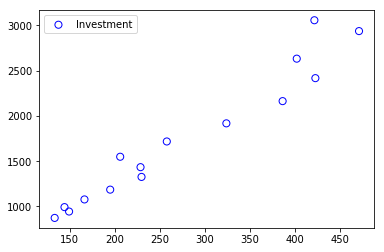

In [57]:
plt.scatter(df['invest'], df['gnp'], facecolor="none", edgecolor="b", s=50, label="Investment")
plt.legend()
plt.show()

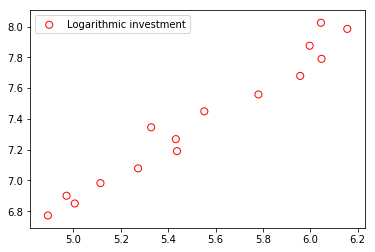

In [58]:
plt.scatter(np.log(df['invest']), np.log(df['gnp']), facecolor="none", edgecolor="r", s=50, label="Logarithmic investment")
plt.legend()
plt.show()

Transformer les 2 variables précédentes
en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

In [59]:
df['gnp_log'] = np.log(df['gnp'])
df['invest_log'] = np.log(df['invest'])
df.head()

,year,gnp,invest,cpi,interest,gnp_log,invest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


3) Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,
covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.
Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté
$\widehat{ \boldsymbol{\theta}}_{n} \in \mathbb{R}^{2}$.

In [60]:
X = df['gnp_log'].values
Y = df['invest_log'].values
n = X.size
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Intercept
Beta_1 = np.sum((X - mean_x)*(Y - mean_y))  / np.sum( (X - mean_x)**2 )

# Slope
Beta_0 = mean_y - Beta_1 * mean_x
print("Intercept is %f" % Beta_0)
print("Slope is %f" % Beta_1)

# Spherical Noise Standard Error
Sigma_chap_2 = 1 / (n - 2) * np.sum( (Y - Beta_0 - X * Beta_1)**2 )

# Beta Standard deviation
V0 = np.sqrt(Sigma_chap_2 * ( 1 / n + mean_x**2 / np.sum( (X - mean_x)**2 ) ) )
V1 = np.sqrt(Sigma_chap_2 * ( 1 / np.sum( (X - mean_x)**2 ) ) )
print("Intercept standard deviation: %f" % V0)
print("Slope standard deviation: %f" % V1)

SSE = np.sum( (Y - Beta_0 - X * Beta_1)**2 )
SST = np.sum( (Y - mean_y)**2 )
r_chap = np.sqrt(1 - SSE / SST)
print("Coefficient of determination: %f" % r_chap)

Intercept is -1.963591
Slope is 1.015281
Intercept standard deviation: 0.409547
Slope standard deviation: 0.055383
Coefficient of determination: 0.981202


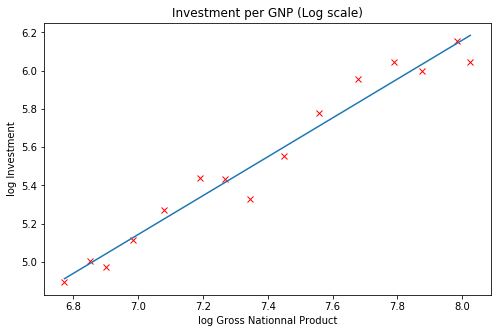

In [61]:
plt.figure(figsize=(8,5))
plt.plot(X,Y,"rx")
plt.plot(X, Beta_0 + X * Beta_1)
plt.title("Investment per GNP (Log scale)", fontsize = 12)
plt.xlabel("log Gross Nationnal Product")
plt.ylabel("log Investment")

plt.show()

See:
* http://lukesonnet.com/teaching/inference/200d_standard_errors.pdf
* https://en.wikipedia.org/wiki/Simple_linear_regression
* https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination

In [62]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
slope, intercept, r_value, p_value, std_err

(1.0152814015988707,
 -1.9635913352301797,
 0.9812019647380379,
 1.136371533355646e-10,
 0.05538306035485267)

4) La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student
(t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

In [63]:
alpha = 0.05
student_degree = len(X) - 2
cv = stats.t.ppf(1.0 - alpha, student_degree)
t_Beta1 = Beta_1 / V1
p_value = 2 *(1 - stats.t.cdf(t_Beta1, student_degree))
print("T-test Beta1 : " + str(round(t_Beta1,2)))
print('p-value : ' + str(p_value))

T-test Beta1 : 18.33
p-value : 1.1363709973011282e-10


5) Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner
l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer
“Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals
for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CIpxq et PIpxq,
respectivement (avec les notations du polycopié, x “ p1, 1000q
T
).

In [64]:
gnp = 1000
gnp_log = np.log(gnp)
invest_log = Beta_0 + gnp_log * Beta_1
print("For gnp = 1000 we predict invest = " + str(np.exp(invest_log)))
alpha = 0.1
quantile = stats.t.ppf(1 - alpha / 2, n - 2)

inf_log = invest_log - quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1/n + (gnp_log - mean_x)**2 / sum((X - mean_x)**2))
sup_log = invest_log + quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1/n + (gnp_log - mean_x)**2 / sum((X - mean_x)**2))
print("Confidence interval for gnp = 1000 is [" + str(np.exp(inf_log)) + ", " + str(np.exp(sup_log)) + "]")

p_inf_log = invest_log - quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1 + 1/n + (gnp_log - mean_x)**2 / sum((X - mean_x)**2))
p_sup_log = invest_log + quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1 + 1/n + (gnp_log - mean_x)**2 / sum((X - mean_x)**2))
print("Confidence interval with noise for gnp = 1000 is [" + str(np.exp(p_inf_log)) + ", " + str(np.exp(p_sup_log)) + "]")

For gnp = 1000 we predict invest = 155.97942793105494
Confidence interval for gnp = 1000 is [146.67552673421952, 165.8734928682758]
Confidence interval with noise for gnp = 1000 is [132.00238933412948, 184.31167845087407]


6) Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de
log(GNP) comprises entre le maximum et le minimum observé sur les données)

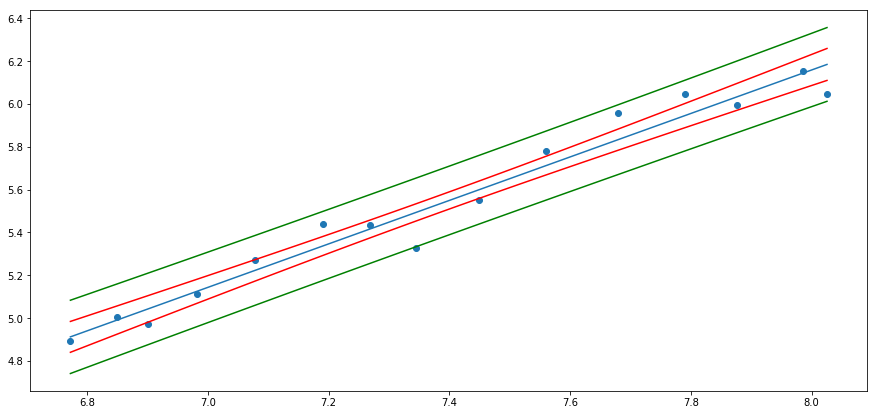

In [65]:
def get_Y_pred_sup(xi):
    return xi * Beta_1 + Beta_0 + quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1/n + (xi - mean_x)**2 / sum((X - mean_x)**2))
def get_Y_pred_inf(xi):
    return xi * Beta_1 + Beta_0 - quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1/n + (xi - mean_x)**2 / sum((X - mean_x)**2))
def get_Y_sup(xi):
    return xi * Beta_1 + Beta_0 + quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1 + 1/n + (xi - mean_x)**2 / sum((X - mean_x)**2))
def get_Y_inf(xi):
    return xi * Beta_1 + Beta_0 - quantile * np.sqrt(Sigma_chap_2) * np.sqrt(1 + 1/n + (xi - mean_x)**2 / sum((X - mean_x)**2))

plot1 = plt.figure(1,figsize=(15,7))
plt.scatter(X, Y)
X_ = np.linspace(X.min(), X.max())
Y_ = [Beta_0 + xi * Beta_1 for xi in X_]
Y_pred_sup = [get_Y_pred_sup(xi) for xi in X_]
Y_pred_inf = [get_Y_pred_inf(xi) for xi in X_]
Y_sup = [get_Y_sup(xi) for xi in X_]
Y_inf = [get_Y_inf(xi) for xi in X_]
plt.plot(X_,Y_pred_sup,c="r")
plt.plot(X_,Y_pred_inf,c="r")
plt.plot(X_,Y_sup,c="green")
plt.plot(X_,Y_inf,c="green")
plt.plot(X_,Y_)
plt.show()

7) En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination
ainsi que l’investissement prédit par le modèle quand GNP vaut 100. La classe
LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que
les valeurs calculées ici coïncident avec celles des questions précédentes.

In [66]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
slope, intercept, r_value, p_value, std_err

(1.0152814015988707,
 -1.9635913352301797,
 0.9812019647380379,
 1.136371533355646e-10,
 0.05538306035485267)

In [67]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X.reshape(-1, 1), Y)

# Make predictions using the testing set
Y_chap = regr.predict(X.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_chap))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_chap))

Coefficients: 
 [1.0152814]
Mean squared error: 0.01
Variance score: 0.96


8) Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut
100 (on donnera à ce point une couleur différente).

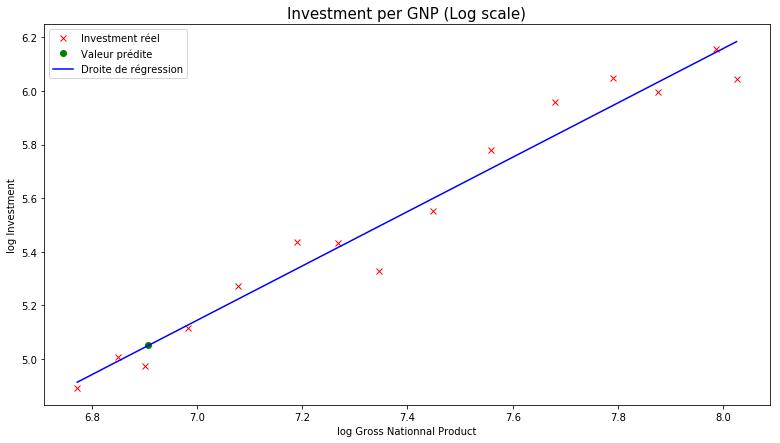

In [68]:
x = np.log(1000)
plt.figure(figsize=(13,7))
plt.plot(X, Y,"rx")
plt.plot(x, Beta_0 + Beta_1 * x,"go")
plt.plot(X, Beta_0 + Beta_1 * X,'b')
plt.title("Investment per GNP (Log scale)", fontsize = 15)
plt.xlabel("log Gross Nationnal Product")
plt.ylabel("log Investment")
plt.legend(("Investment réel","Valeur prédite","Droite de régression"))
plt.show()


NOTE : On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique).
Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations
élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de
numpy.linalg).

9) Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de
rang plein ?

In [69]:
from numpy import linalg
X = np.concatenate( (np.ones((n,1)), df[['gnp_log', 'interest']].values), axis=1)
Y = df['invest_log'].values
n, p = X.shape
n, p

(15, 3)

In [70]:
gram_mat = (X.T @ X)
gram_mat_inv = linalg.inv(X.T @ X)
display(linalg.inv(gram_mat))
print("Rank of gram matrix is " + str(linalg.matrix_rank(gram_mat)))
print("Gram matrix is full rank")

array([[ 5.35582897e+01, -8.20827474e+00,  9.54604525e-01],
       [-8.20827474e+00,  1.27148125e+00, -1.58296934e-01],
       [ 9.54604525e-01, -1.58296934e-01,  2.87392805e-02]])

Rank of gram matrix is 3
Gram matrix is full rank


10) Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écarttypes
ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité
de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une
forme convenable. Discuter de la significativité des coefficients.

In [71]:
Beta_chap = (gram_mat_inv @ X.T) @ Y
print("Regression coefficient are: " + str(Beta_chap))
sigma_chap_2 = 1/(n-p) * (Y - X @ Beta_chap) @ (Y - X @ Beta_chap).T
cov_Beta_chap = sigma_chap_2 * gram_mat_inv
display(cov_Beta_chap)
print("b0 = " + str(np.sqrt(cov_Beta_chap[0, 0])))
print("b1 = " + str(np.sqrt(cov_Beta_chap[1, 1])))
print("b2 = " + str(np.sqrt(cov_Beta_chap[2, 2])))
R2 = 1 - np.sum( (Y - X @ Beta_chap)**2) / np.sum( (Y - mean_y)**2)
print("R2 = " + str(R2))

Regression coefficient are: [-2.18045473  1.05124269 -0.00652888]


array([[ 4.38772697e-01, -6.72457405e-02,  7.82053357e-03],
       [-6.72457405e-02,  1.04165249e-02, -1.29683702e-03],
       [ 7.82053357e-03, -1.29683702e-03,  2.35444629e-04]])

b0 = 0.6623991977961544
b1 = 0.10206137806188986
b2 = 0.015344205065600875
R2 = 0.9633108306726242


In [72]:
alpha = 0.05
student_degree = n - p
cv = stats.t.ppf(1.0 - alpha, student_degree)
t_Beta = [Beta_chap[i] / np.sqrt(sigma_chap_2 * gram_mat_inv[i,i]) for i in range(0, p)]
p_values = [2 *(1 - stats.t.cdf(abs(t_Beta[i]), student_degree)) for i in range(0, p)]
print("H0: Beta1 = O")
print("T-test = " + str(t_Beta[1]) + "    p-value = " + str(p_values[1]))
print("We can reject H0 and log of gnp has strong influence")
print("H0: Beta2 = O")
print("T-test = " + str(t_Beta[2]) + "    p-value = " + str(p_values[2]))
print("We can't reject H0 and interest may be ommited from our model")

H0: Beta1 = O
T-test = 10.30010285263868    p-value = 2.5995168484449493e-07
We can reject H0 and log of gnp has strong influence
H0: Beta2 = O
T-test = -0.4254947961224696    p-value = 0.678007141884684
We can't reject H0 and interest may be ommited from our model


11) Pour les valeurs de GNP 1000 et interest 10, i.e., x “ p1, 1000, 10q
T
, prédire log(investment) et
donner les intervalles de confiance CIpxq et PIpxq au niveau 99.9%.

In [73]:
x = np.array([1, np.log(1000), 10])
y_pred = Beta_chap @ x
print("For gnp = 1000 and interest = 10 we predict log_invest = " + str(y_pred))
alpha = 0.001
quantile = stats.t.ppf(1 - alpha / 2, n - p)

inf_log = y_pred - quantile * np.sqrt(sigma_chap_2 * x.T @ gram_mat_inv @ x)
sup_log = y_pred + quantile * np.sqrt(sigma_chap_2 * x.T @ gram_mat_inv @ x)
print("Confidence interval for gnp = 1000 and interest = 10 is [" + str(inf_log) + ", " + str(sup_log) + "]")

pre_inf_log = y_pred - quantile * np.sqrt(sigma_chap_2 * (1 + x.T @ gram_mat_inv @ x))
pre_sup_log = y_pred + quantile * np.sqrt(sigma_chap_2 * (1 + x.T @ gram_mat_inv @ x))
print("Confidence interval with noise for gnp = 1000 and interest = 10 is [" + str(pre_inf_log) + ", " + str(pre_sup_log) + "]")

For gnp = 1000 and interest = 10 we predict log_invest = 5.015983730482319
Confidence interval for gnp = 1000 and interest = 10 is [4.640184036687824, 5.391783424276815]
Confidence interval with noise for gnp = 1000 and interest = 10 is [4.473803343639975, 5.558164117324663]


12) Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment),
tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance
à 99.9% (ces surfaces seront tracées sur le domaine de définition des données).

In [75]:
def get_Y_pred_sup(xi):
    return Beta_chap @ xi + quantile * np.sqrt(sigma_chap_2 * xi.T @ gram_mat_inv @ xi)
def get_Y_pred_inf(xi):
    return Beta_chap @ xi - quantile * np.sqrt(sigma_chap_2 * xi.T @ gram_mat_inv @ xi)
def get_Y_sup(xi):
    return Beta_chap @ xi + quantile * np.sqrt(sigma_chap_2 * (1 + xi.T @ gram_mat_inv @ xi))
def get_Y_inf(xi):
    return Beta_chap @ xi - quantile * np.sqrt(sigma_chap_2 * (1 + xi.T @ gram_mat_inv @ xi))
X_ = np.vstack([np.linspace(mi, ma, num=15) for (mi, ma) in zip(np.amin(X, axis=0),np.amax(X, axis=0))]).T
X_1, X_2 = np.meshgrid(X_[:,1],X_[:,2])
plot_shape = X_1.shape
Y_ = Beta_chap[0] + Beta_chap[1] * X_1 + Beta_chap[2] * X_2 
Y_pred_sup = []
Y_pred_inf = []
Y_sup = []
Y_inf = []
for x1,x2 in zip(X_1.flatten(), X_2.flatten()):
    xi = np.array([1, x1, x2]).T
    Y_pred_sup.append(get_Y_pred_sup(xi))
    Y_pred_inf.append(get_Y_pred_inf(xi))
    Y_sup.append(get_Y_sup(xi))
    Y_inf.append(get_Y_inf(xi))
Y_pred_sup = np.array(Y_pred_sup).reshape(plot_shape)
Y_pred_inf = np.array(Y_pred_inf).reshape(plot_shape)
Y_sup = np.array(Y_sup).reshape(plot_shape)
Y_inf = np.array(Y_inf).reshape(plot_shape)

<IPython.core.display.Javascript object>


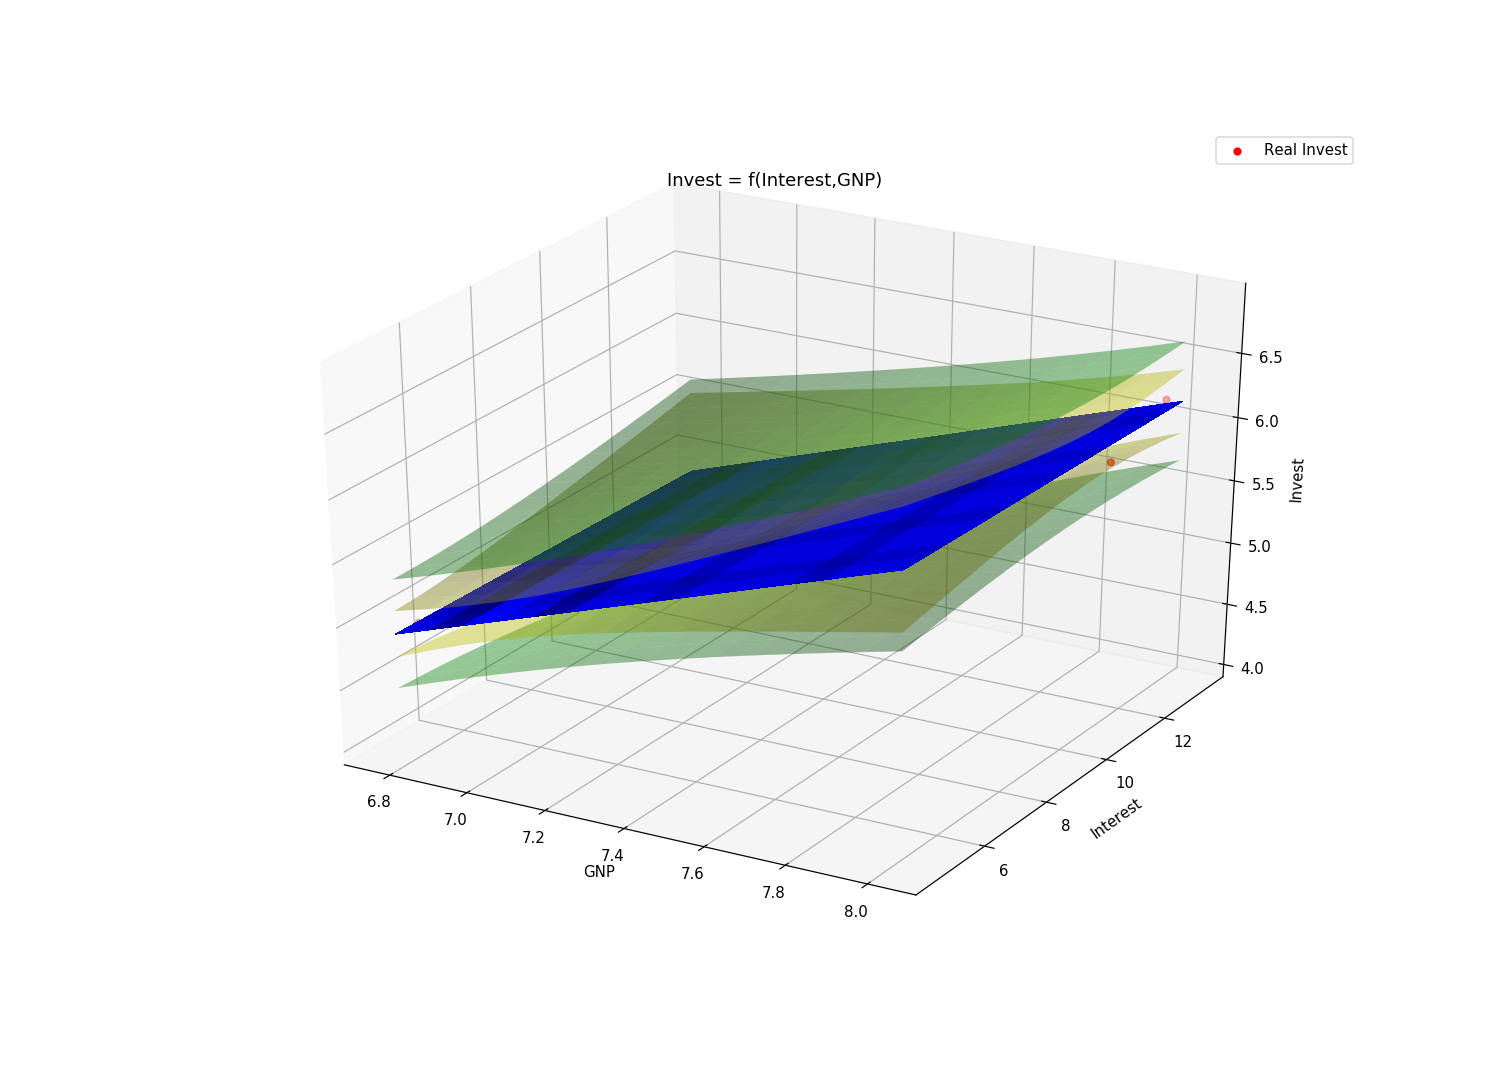

In [76]:
%matplotlib notebook
fig = plt.figure(figsize=(14,10))
axes = fig.gca(projection='3d')
axes.scatter3D(X[:,1], X[:,2], Y, color = "r", marker = "o", label="Real Invest")

# Plot the surface.
axes.plot_surface(X_1, X_2, Y_, color="b",
                       linewidth=1, antialiased=False)
axes.plot_surface(X_1, X_2 ,Y_pred_inf, color="y", alpha=0.4)
axes.plot_surface(X_1, X_2 ,Y_pred_sup, color="y", alpha=0.4)
axes.plot_surface(X_1, X_2 ,Y_sup, color="g", alpha=0.4)
axes.plot_surface(X_1, X_2 ,Y_inf, color="g", alpha=0.4)

axes.set_title("Invest = f(Interest,GNP)")
axes.set_xlabel("GNP")
axes.set_ylabel("Interest")
axes.set_zlabel("Invest")
axes.legend()
plt.show()

13) En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 100 et interest
10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire.
Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept=False).fit(X, Y)

np.amin(X, axis=0),np.amax(X, axis=0)
display(model.coef_)
print("R2 = " + str(r2_score(model.predict(X), Y)))

x = np.array([1, np.log(1000), 10])
print("For gnp = 1000 and invest = 10 we predict log invest = " + str(model.predict(x.reshape(1,-1))))

array([-2.18045473,  1.05124269, -0.00652888])

R2 = 0.961913467430074
For gnp = 1000 and invest = 10 we predict log invest = [5.01598373]
